# Assignment-1: Data Visualization with Haberman Dataset [M]

### Objective: 
To analyse the Survival status of the patients who had undergone surgery for breast cancer

In [2]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#reading data
df= pd.read_csv("haberman.csv")
print(df.shape)

(306, 4)


In [68]:
#print the column names
print(df.columns)

Index(['age', 'op_year', 'axil_lymph_nodes', 'survival_status'], dtype='object')


In [34]:
df["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

We observe that 225 patients survived more than 5 years and 81 survived less than 5 years who had undergone surgery.

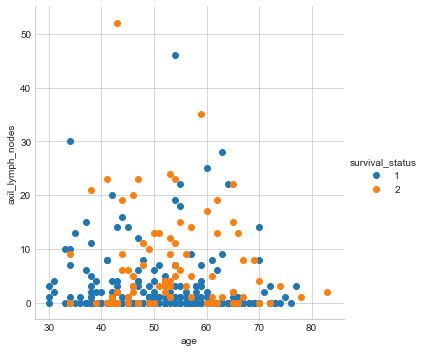

In [6]:
#2-D scatter plot
sns.FacetGrid(df, hue= "survival_status", size= 5) \
   .map(plt.scatter,"age","axil_lymph_nodes") \
   .add_legend()
sns.set_style("whitegrid")
plt.show()

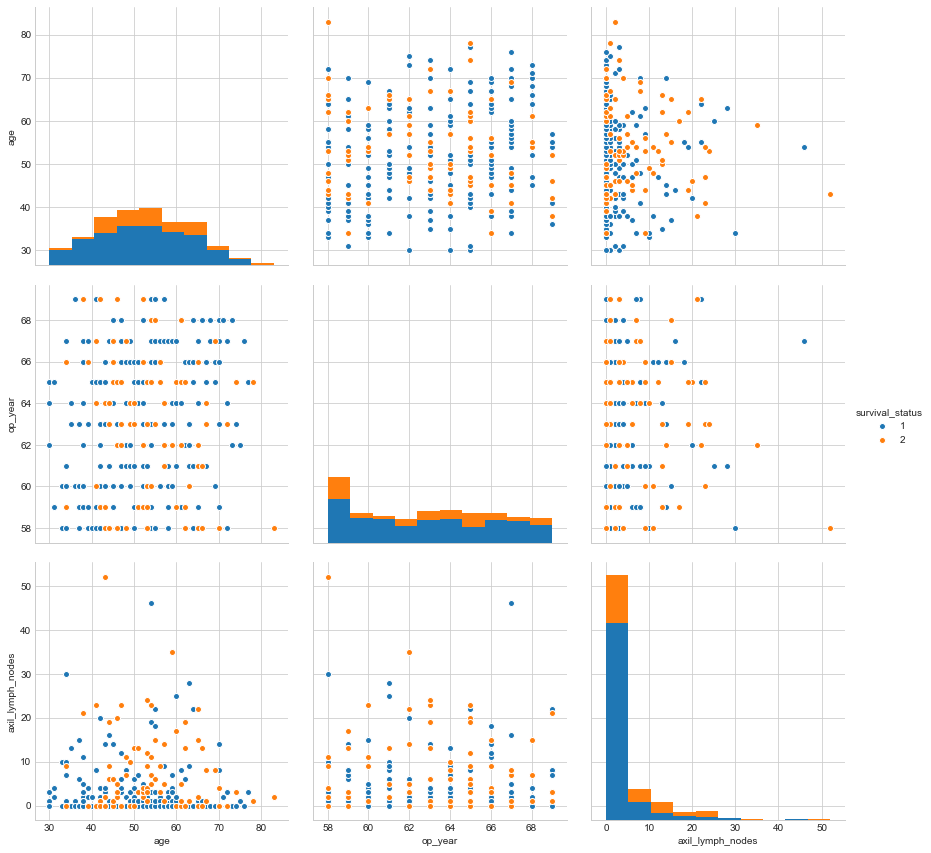

In [22]:
#pair plot
sns.pairplot(df,hue='survival_status',vars=["age","op_year","axil_lymph_nodes"],size=4)
plt.show()

###### Observation:

1. In each pair plot there is too much overlapping so its difficult to conclude about survival status
2. Age and axil_lymph_nodes are useful features as we are somewhat able to distinguish about survival status.

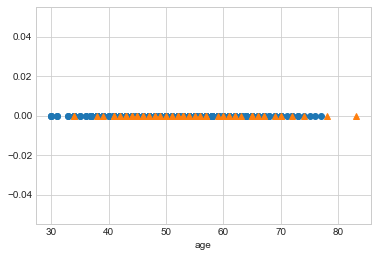

In [24]:
# 1-D scatter plot
positive_status = df.loc[df["survival_status"] == 1]
negative_status = df.loc[df["survival_status"] == 2]
plt.plot(positive_status["age"],np.zeros_like(positive_status["age"]),'o')
plt.plot(negative_status["age"],np.zeros_like(negative_status["age"]),'^')
plt.xlabel("age")
plt.show()

###### Observations:

1.With age feature there is too much overlapping so classification is not possible.


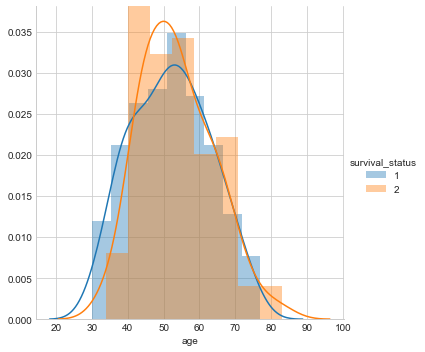

In [57]:
# Histogram,pdf
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(df, hue= "survival_status", size= 5)\
   .map(sns.distplot,"age")\
   .add_legend();
plt.show();

###### Observation:
1.In the above histogram with age feature there is too much overlapping between age 35 to 75, difficult to infer any result.

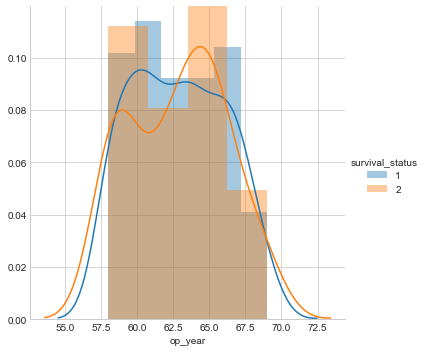

In [53]:
sns.FacetGrid(df, hue= "survival_status", size=5)\
   .map(sns.distplot,"op_year")\
   .add_legend()
plt.show()

###### Observation:
1.In the above histogram with op_year feature also there is too much overlapping,difficult to infer any result.

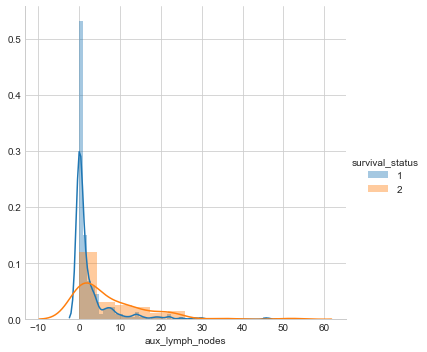

In [59]:
sns.FacetGrid(df, hue= "survival_status", size=5)\
   .map(sns.distplot,"axil_lymph_nodes")\
   .add_legend()
plt.show()

###### Observation:

1.If axil_lymph_nodes feature >=0 and <=3, patients survived more than 5 yrs are higher in number else if axil_lymph_nodes >3, patients survived less than 5 yrs.

pdf for positive status=  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
bin_edges=  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
********************************************************************************
pdf for negative status=  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin_edges= [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


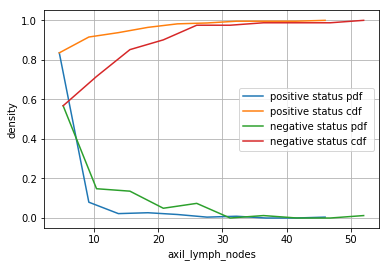

In [27]:
# PDF and CDF plot for axil_lymph_nodes

#Positive survival status
label=["positive status pdf", "positive status cdf","negative status pdf", "negative status cdf "]
counts,bin_edges= np.histogram(positive_status["axil_lymph_nodes"],bins= 10, density= True)
pdf= counts/(sum(counts))
print("pdf for positive status= ",pdf)
print("bin_edges= ",bin_edges)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

print("*"*80)

#Negative survival status
counts,bin_edges= np.histogram(negative_status["axil_lymph_nodes"],bins= 10, density= True)
pdf= counts/(sum(counts))
print("pdf for negative status= ",pdf)
print("bin_edges=",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.grid()
plt.legend(label)
plt.xlabel("axil_lymph_nodes")
plt.ylabel("density")
plt.show()

###### Observations:

1. If axil_lymph_nodes <= 3, the positive survival status is 82%
2. If axil_lymph_nodes >= 32, the negative survival status reaches to 100%

In [25]:
# Mean, Variance, Std Deviation
print("Means")
print(np.mean(positive_status["axil_lymph_nodes"]))
print(np.mean(negative_status["axil_lymph_nodes"]))

print("\nQuantiles")
print(np.percentile(positive_status["axil_lymph_nodes"],np.arange(25,100,25)))
print(np.percentile(negative_status["axil_lymph_nodes"],np.arange(25,100,25)))

print("\n90th Percentiles:")
print(np.percentile(positive_status["axil_lymph_nodes"],90))
print(np.percentile(negative_status["axil_lymph_nodes"],90))

print("\nMedian Absolute Deviation")
from statsmodels import robust
print(robust.mad(positive_status["axil_lymph_nodes"]))
print(robust.mad(negative_status["axil_lymph_nodes"]))


Means
2.7911111111111113
7.45679012345679

Quantiles
[0. 0. 3.]
[ 1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


1. From means, we observe that, the number of axil lymph nodes are almost 3 for positive status of survival(more than 5 years) while those having 7 axil_lymph nodes have negative status(less than 5 years).

2. From quantiles, for positive survival status, 50th% of axil_lymph_nodes equals to 0 and 75th% equals to 3 while in case of negative survival status, 75th% of axil_lymph_nodes equals to 11.

3. 90% of axil_lymph_nodes less than 8 have positive survival status whereas 90% patients who survived less than five years have 20 axil_lymph_nodes.

4. From MAD, we observe that positive survival status had 0 deviation from mean value of nodes while in negative survival status the deviation is almost 6.

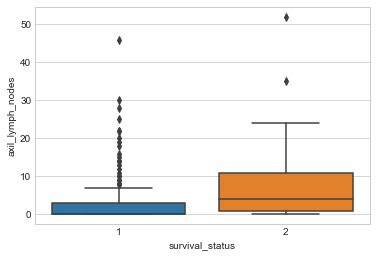

In [30]:
sns.boxplot(x= "survival_status",y= "axil_lymph_nodes",data= df)
sns.set_style("whitegrid")
plt.show()

###### Observations:
1. In box plot for survival_status 1, if axil_lymph_nodes > 0 and <=3, then survival_status is more than 5 years.
2. The threshold value for survival_status 1 is 7,and we observe that 50th percentile of survival_status 2 is almost same as 75th percentile of survival_status 1, so chances of error in above condition is 50% .

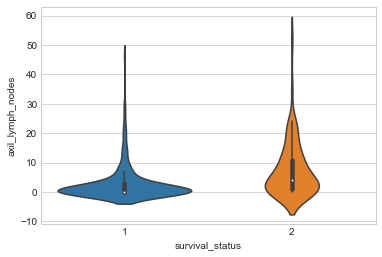

In [45]:
sns.violinplot(x="survival_status", y= "axil_lymph_nodes", data= df)
plt.show()

###### Observations:

1.It is same as the box plots.The curve represents the probability density.

2.For survival status 1, we observe that the density of patients surviving more than 5 years is high near axil_lymph_nodes= 0

3.For survival_status 2, the density of patients survived less than 5 years is high near axil_lymph_nodes = 2

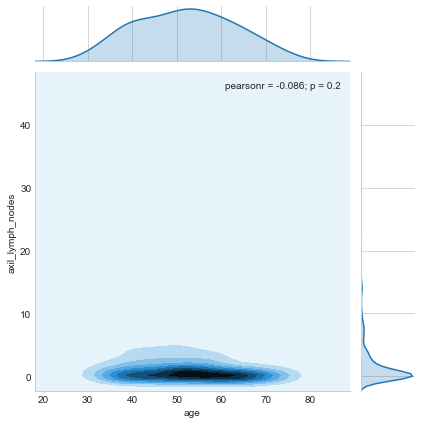

In [31]:
# multivariate Probability density, Contour plot
sns.jointplot(x="age", y= "axil_lymph_nodes", data= positive_status, kind= "kde")
plt.show()

###### Observation:
1. We observe that patients aged between 48 and 63 years with axil_lymph_nodes between 0 and 2, have high density of positive survival status which decreases with the increase in axil_lymph_nodes.